#Modelling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,  learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from xgboost import plot_importance
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of Airline_Final_Classification.csv")
df.head()

,DEP_DELAY,tavg,prcp,wspd,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,OP_CARRIER_F9,OP_CARRIER_HA,OP_CARRIER_MQ,OP_CARRIER_NK,OP_CARRIER_OO,OP_CARRIER_UA,OP_CARRIER_US,OP_CARRIER_VX,OP_CARRIER_WN,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,0,18.3,0.0,12.6,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0,18.3,0.0,12.6,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,18.3,0.0,12.6,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,18.3,0.0,12.6,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,0,18.3,0.0,12.6,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
df.isna().sum()

DEP_DELAY              0
tavg                   0
prcp                   0
wspd                   0
OP_CARRIER_AS          0
OP_CARRIER_B6          0
OP_CARRIER_DL          0
OP_CARRIER_EV          0
OP_CARRIER_F9          0
OP_CARRIER_HA          0
OP_CARRIER_MQ          0
OP_CARRIER_NK          0
OP_CARRIER_OO          0
OP_CARRIER_UA          0
OP_CARRIER_US          0
OP_CARRIER_VX          0
OP_CARRIER_WN          0
DayOfWeek_Monday       0
DayOfWeek_Saturday     0
DayOfWeek_Sunday       0
DayOfWeek_Thursday     0
DayOfWeek_Tuesday      0
DayOfWeek_Wednesday    0
HOUR_1                 0
HOUR_2                 0
HOUR_3                 0
HOUR_4                 0
HOUR_5                 0
HOUR_6                 0
HOUR_7                 0
HOUR_8                 0
HOUR_9                 0
HOUR_10                0
HOUR_11                0
HOUR_12                0
HOUR_13                0
HOUR_14                0
HOUR_15                0
HOUR_16                0
HOUR_17                0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667514 entries, 0 to 5667513
Data columns (total 46 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DEP_DELAY            int64  
 1   tavg                 float64
 2   prcp                 float64
 3   wspd                 float64
 4   OP_CARRIER_AS        bool   
 5   OP_CARRIER_B6        bool   
 6   OP_CARRIER_DL        bool   
 7   OP_CARRIER_EV        bool   
 8   OP_CARRIER_F9        bool   
 9   OP_CARRIER_HA        bool   
 10  OP_CARRIER_MQ        bool   
 11  OP_CARRIER_NK        bool   
 12  OP_CARRIER_OO        bool   
 13  OP_CARRIER_UA        bool   
 14  OP_CARRIER_US        bool   
 15  OP_CARRIER_VX        bool   
 16  OP_CARRIER_WN        bool   
 17  DayOfWeek_Monday     bool   
 18  DayOfWeek_Saturday   bool   
 19  DayOfWeek_Sunday     bool   
 20  DayOfWeek_Thursday   bool   
 21  DayOfWeek_Tuesday    bool   
 22  DayOfWeek_Wednesday  bool   
 23  HOUR_1               bool   
 24

In [ ]:
for column in df.columns:
    print("Column:", column)
    print("Unique values:", df[column].unique())


Column: DEP_DELAY
Unique values: [0 1]
Column: tavg
Unique values: [ 18.3        -1.7        22.8         6.3         0.7        -3.3
  23.4        -6.7        26.4         2.7         0.9         8.4
  -7.9        21.2        -0.9        -7.7         4.6         8.8
   5.6        17.3        -1.5        -1.1        -5.8        -9.2
  10.2         4.4         9.7         6.8        -7.4        -6.8
   3.1        -9.9         2.8       -10.2         6.4         3.4
   0.1         5.4        -4.9         7.5        -2.7        -8.3
   8.3        14.1550502  -1.3       -13.9        -8.9        23.8
   4.7        -9.1        -4.1         4.2         8.9         5.9
  -4.7        -6.3         1.9        -5.4       -12.2        -2.6
  -5.9        -2.2        -3.2        -5.5       -15.6         1.6
  -3.1         3.6         3.3         6.5        -4.4        -4.8
  -7.2       -11.          5.2        -7.6       -10.5       -19.3
   0.5        -2.9         8.1       -15.9       -12.        -

In [ ]:
# Extracting numerical features
numerical_features = df.select_dtypes(include=['float64'])

# Standardizing numerical features
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)
df.drop(columns=numerical_features.columns, inplace=True)
new_df = pd.DataFrame(data=scaled_numerical_features, columns=numerical_features.columns)
data2 = pd.concat([df, new_df], axis=1)

In [ ]:
bool_columns = data2.select_dtypes(include=bool).columns
data2[bool_columns] = data2[bool_columns].astype(int) # converting boolean columns to integers (0 and 1)

In [ ]:
delay_0 = data2[data2['DEP_DELAY'] == 0].sample(n=100000, random_state=821)
delay_1 = data2[data2['DEP_DELAY'] == 1].sample(n=100000, random_state=821)

# Concatenating the sampled dataframes
data = pd.concat([delay_0, delay_1], ignore_index=True)

In [ ]:
data.isna().sum()

DEP_DELAY              0
OP_CARRIER_AS          0
OP_CARRIER_B6          0
OP_CARRIER_DL          0
OP_CARRIER_EV          0
OP_CARRIER_F9          0
OP_CARRIER_HA          0
OP_CARRIER_MQ          0
OP_CARRIER_NK          0
OP_CARRIER_OO          0
OP_CARRIER_UA          0
OP_CARRIER_US          0
OP_CARRIER_VX          0
OP_CARRIER_WN          0
DayOfWeek_Monday       0
DayOfWeek_Saturday     0
DayOfWeek_Sunday       0
DayOfWeek_Thursday     0
DayOfWeek_Tuesday      0
DayOfWeek_Wednesday    0
HOUR_1                 0
HOUR_2                 0
HOUR_3                 0
HOUR_4                 0
HOUR_5                 0
HOUR_6                 0
HOUR_7                 0
HOUR_8                 0
HOUR_9                 0
HOUR_10                0
HOUR_11                0
HOUR_12                0
HOUR_13                0
HOUR_14                0
HOUR_15                0
HOUR_16                0
HOUR_17                0
HOUR_18                0
HOUR_19                0
HOUR_20                0


In [ ]:
X = data.drop(columns=['DEP_DELAY'])
y = data['DEP_DELAY']

# smote = SMOTE(random_state=821)
# X, y= smote.fit_resample(X, y)
# data2 = pd.DataFrame(X, columns=X.columns)
# data2['DEP_DELAY'] = y

# print("After SMOTE:")
# print(data2['DEP_DELAY'].value_counts())

After SMOTE:
DEP_DELAY
1    314209
0    314209
Name: count, dtype: int64


In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=821)


print("Train set - X:", X_train.shape, "y:", y_train.shape)
print("Test set - X:", X_test.shape, "y:", y_test.shape)

Train set - X: (439892, 45) y: (439892,)
Test set - X: (188526, 45) y: (188526,)


In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Logistic Regression Metrics:
Best Parameters: {'C': 0.001}
Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219937
           1       1.00      1.00      1.00    219955

    accuracy                           1.00    439892
   macro avg       1.00      1.00      1.00    439892
weighted avg       1.00      1.00      1.00    439892

Classification Report for Testing:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94272
           1       1.00      1.00      1.00     94254

    accuracy                           1.00    188526
   macro avg       1.00      1.00      1.00    188526
weighted avg       1.00      1.00      1.00    188526



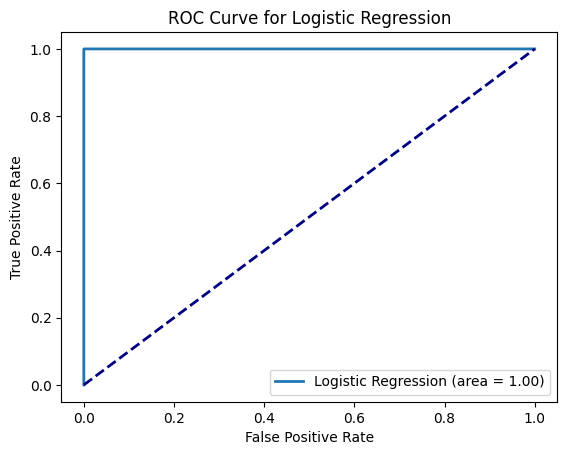

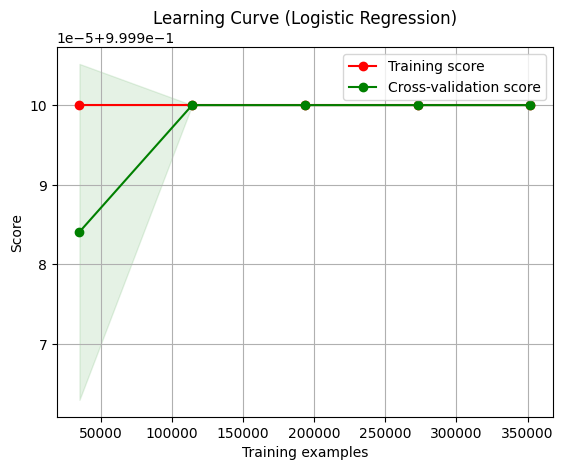

In [ ]:
lr_model = LogisticRegression(max_iter=1000, solver='sag')
lr_param_grid = {'C': [0.01, 0.1, 0.5, 1, 10]}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, scoring='accuracy', cv=5)
lr_grid_result = lr_grid_search.fit(X_train, y_train)

# Predictions on training and testing data
lr_y_train_pred = lr_grid_result.predict(X_train)
lr_y_test_pred = lr_grid_result.predict(X_test)

# Classification report for training and testing sets
print("Logistic Regression Metrics:")
print("Best Parameters:", lr_grid_result.best_params_)
print("Classification Report for Training:")
print(classification_report(y_train, lr_y_train_pred))
print("Classification Report for Testing:")
print(classification_report(y_test, lr_y_test_pred))

# ROC curve and AUC score
lr_probs = lr_grid_result.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")

# Learning curve
title_lr = "Learning Curve (Logistic Regression)"
plot_learning_curve(lr_grid_result.best_estimator_, title_lr, X_train, y_train, cv=5)

plt.show()

In [ ]:
# SVM
svm_model = SVC(probability=True)
svm_param_grid = {'C': [0.01, 0.1, 0.5, 1, 10], 'kernel': ['linear', 'rbf', 'sigmoid'],  'gamma': [1, 0.1, 0.01, 0.001]}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, scoring='accuracy', cv=5)
svm_grid_result = svm_grid_search.fit(X_train, y_train)

# Predictions on training and testing data
svm_y_train_pred = svm_grid_result.predict(X_train)
svm_y_test_pred = svm_grid_result.predict(X_test)

# Classification report for training and testing sets
print("SVM Metrics:")
print("Best Parameters:", svm_grid_result.best_params_)
print("Classification Report for Training:")
print(classification_report(y_train, svm_y_train_pred))
print("Classification Report for Testing:")
print(classification_report(y_test, svm_y_test_pred))

# ROC curve and AUC score
svm_probs = svm_grid_result.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")

# Learning curve
title_svm = "Learning Curve (SVM)"
plot_learning_curve(svm_grid_result.best_estimator_, title_svm, X_train, y_train, cv=5)

plt.show()

Random Forest Metrics:
Best Parameters: {'max_depth': 7, 'n_estimators': 300}
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64    219937
           1       0.63      0.60      0.62    219955

    accuracy                           0.63    439892
   macro avg       0.63      0.63      0.63    439892
weighted avg       0.63      0.63      0.63    439892

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.62      0.65      0.64     94272
           1       0.63      0.60      0.61     94254

    accuracy                           0.63    188526
   macro avg       0.63      0.63      0.63    188526
weighted avg       0.63      0.63      0.63    188526



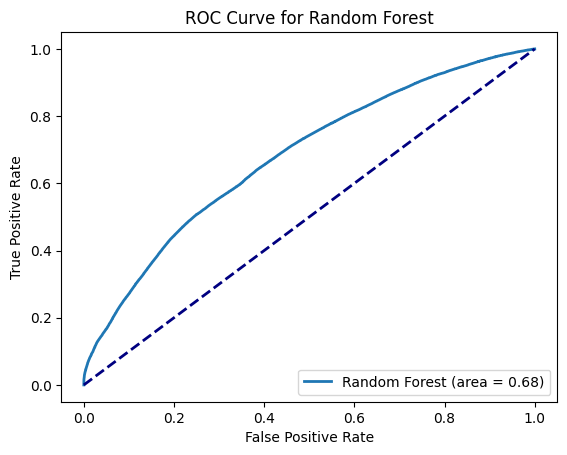

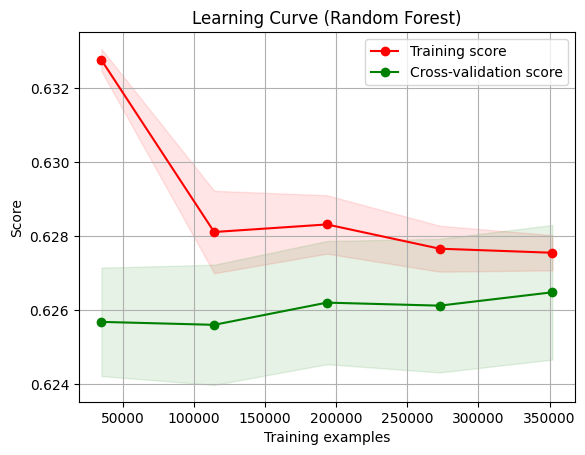

In [ ]:
# Random Forest
rf_model = RandomForestClassifier()
rf_param_grid = {'n_estimators': [100, 300, 400, 500, 700], 'max_depth': [2, 3, 5, 7, 9, 11], min_samples_split: [2, 3, 5, 10, 15]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, scoring='accuracy', cv=5)
rf_grid_result = rf_grid_search.fit(X_train, y_train)

# Predictions on training and testing data
rf_y_train_pred = rf_grid_result.predict(X_train)
rf_y_test_pred = rf_grid_result.predict(X_test)

# Classification report for training and testing sets
print("Random Forest Metrics:")
print("Best Parameters:", rf_grid_result.best_params_)
print("Classification Report for Training:")
print(classification_report(y_train, rf_y_train_pred))
print("Classification Report for Testing:")
print(classification_report(y_test, rf_y_test_pred))

# ROC curve and AUC score
rf_probs = rf_grid_result.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")

# Learning curve
title_rf = "Learning Curve (Random Forest)"
plot_learning_curve(rf_grid_result.best_estimator_, title_rf, X_train, y_train, cv=5)

plt.show()


KNN Metrics:
Best Parameters: {'n_neighbors': 3}
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81    219937
           1       0.80      0.85      0.82    219955

    accuracy                           0.82    439892
   macro avg       0.82      0.82      0.82    439892
weighted avg       0.82      0.82      0.82    439892

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63     94272
           1       0.64      0.69      0.66     94254

    accuracy                           0.65    188526
   macro avg       0.65      0.65      0.65    188526
weighted avg       0.65      0.65      0.65    188526



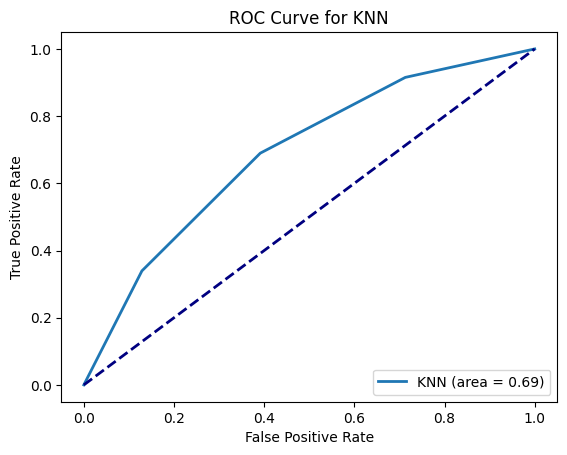

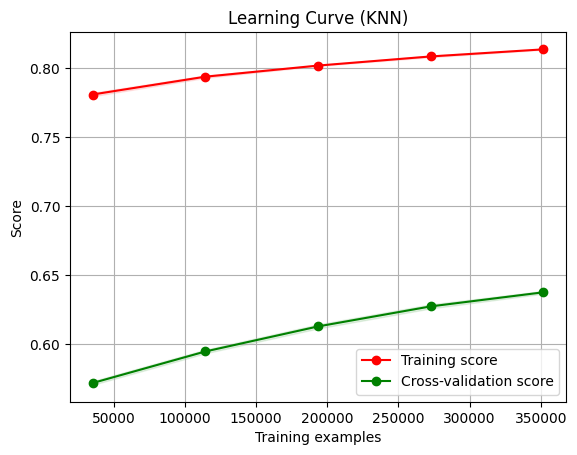

In [ ]:
# KNN model
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [2, 3, 4, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, scoring='accuracy', cv=5)
knn_grid_result = knn_grid_search.fit(X_train, y_train)

# Predictions on training and testing data
knn_y_train_pred = knn_grid_result.predict(X_train)
knn_y_test_pred = knn_grid_result.predict(X_test)

# Classification report for training and testing sets
print("KNN Metrics:")
print("Best Parameters:", knn_grid_result.best_params_)
print("Classification Report for Training:")
print(classification_report(y_train, knn_y_train_pred))
print("Classification Report for Testing:")
print(classification_report(y_test, knn_y_test_pred))

# ROC curve and AUC score
knn_probs = knn_grid_result.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")

# Learning curve
title_knn = "Learning Curve (KNN)"
plot_learning_curve(knn_grid_result.best_estimator_, title_knn, X_train, y_train, cv=5)

plt.show()


In [ ]:
# XGBoost
xgb_model = XGBClassifier(enable_categorical=True)
xgb_param_grid = {'n_estimators': [50, 100, 200, 300, 500], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1], max_depth: [3, 5, 7, 9]}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, scoring='accuracy', cv=5)
xgb_grid_result = xgb_grid_search.fit(X_train, y_train)

# Predictions on training and testing data
xgb_y_train_pred = xgb_grid_result.predict(X_train)
xgb_y_test_pred = xgb_grid_result.predict(X_test)

# Classification report for training and testing sets
print("XGBoost Metrics:")
print("Best Parameters:", xgb_grid_result.best_params_)
print("Classification Report for Training:")
print(classification_report(y_train, xgb_y_train_pred))
print("Classification Report for Testing:")
print(classification_report(y_test, xgb_y_test_pred))

# ROC curve and AUC score
xgb_probs = xgb_grid_result.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")

# Learning curve
title_xgb = "Learning Curve (XGBoost)"
plot_learning_curve(xgb_grid_result.best_estimator_, title_xgb, X_train, y_train, cv=5)

plt.show()


In [ ]:
# Plot feature importances
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_importance(xgb_grid_result.best_estimator_, ax=ax)
plt.show()